Develop a GRU based term stock price prediction model for tickers in yahoo finance.

[*********************100%%**********************]  1 of 1 completed

Epoch 1/25


62/62 [==============================] - 9s 62ms/step - loss: 6562.1548
Epoch 2/25
62/62 [==============================] - 4s 57ms/step - loss: 3766.1960
Epoch 3/25
62/62 [==============================] - 3s 48ms/step - loss: 2516.8699
Epoch 4/25
62/62 [==============================] - 3s 48ms/step - loss: 1638.3453
Epoch 5/25
62/62 [==============================] - 4s 60ms/step - loss: 395.1828
Epoch 6/25
62/62 [==============================] - 4s 57ms/step - loss: 93.2247
Epoch 7/25
62/62 [==============================] - 3s 48ms/step - loss: 37.5666
Epoch 8/25
62/62 [==============================] - 3s 48ms/step - loss: 20.2014
Epoch 9/25
62/62 [==============================] - 4s 57ms/step - loss: 13.3930
Epoch 10/25
62/62 [==============================] - 4s 60ms/step - loss: 9.1670
Epoch 11/25
62/62 [==============================] - 3s 48ms/step - loss: 7.9815
Epoch 12/25
62/62 [==============================] - 3s 47ms/step - loss: 6.0333
Epoch 13/25
62/62 [===========

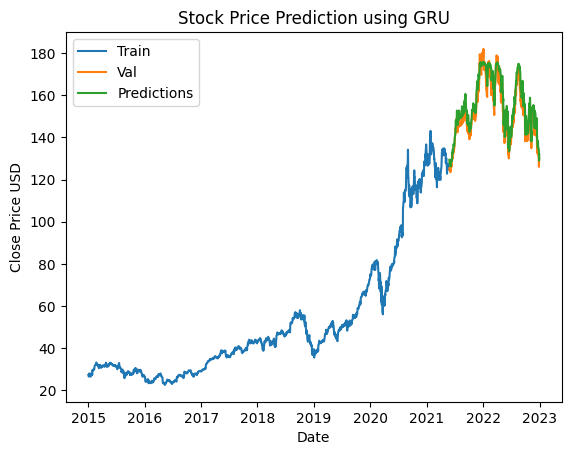

In [ ]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

df = yf.download('AAPL', start='2015-01-01', end='2023-01-01')[['Close']]

scaled_data = df.values

x_train, y_train = [], []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential([
    GRU(50, return_sequences=True),
    GRU(50, return_sequences=False),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25)

train_size = int(len(df) * 0.8)
test_data = df[train_size-60:].values

x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)

train = df[:train_size]
valid = df[train_size:].copy()
valid['predicitons'] = predictions
plt.title('Stock Price Prediction using GRU')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predicitons']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()